In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("Grocery_Inventory.csv")
print(df.head())

      Product_Name             Catagory Supplier_Name  \
0      Bell Pepper  Fruits & Vegetables        Eimbee   
1    Vegetable Oil          Oils & Fats      Digitube   
2  Parmesan Cheese                Dairy        BlogXS   
3           Carrot  Fruits & Vegetables        Avaveo   
4           Garlic  Fruits & Vegetables          Katz   

        Warehouse_Location        Status   Product_ID  Supplier_ID  \
0  20 Pennsylvania Parkway  Discontinued  29-017-6255  43-348-2450   
1      03643 Oakridge Lane   Backordered  79-569-8856  04-854-7165   
2        73 Graedel Street  Discontinued  28-146-2641  82-995-0739   
3      44801 Myrtle Center  Discontinued  11-581-9869  22-867-3079   
4     6195 Monterey Center  Discontinued  13-202-4809  24-281-7685   

  Date_Received Last_Order_Date Expiration_Date  Stock_Quantity  \
0    03-01-2024      01-06-2025       1/31/2025              46   
1    04-01-2024       5/19/2024      06-11-2024              51   
2    04-01-2024      12/21/2024    

In [2]:
# Convert Unit Price USD to INR
df['Unit_Price_USD'] = df['Unit_Price'].str.replace('$', '', regex=False).astype(float)
USD_TO_INR = 89.92

df['Unit_Price_INR'] = df['Unit_Price_USD'] * USD_TO_INR
print(df['Unit_Price_INR'].head())

0     413.632
1     179.840
2    1079.040
3     134.880
4     629.440
Name: Unit_Price_INR, dtype: float64


In [3]:
# Which Product Sell by Supplier
Product_Sell_by_Supplier=df[['Supplier_Name','Product_Name']]
print(Product_Sell_by_Supplier)

    Supplier_Name     Product_Name
0          Eimbee      Bell Pepper
1        Digitube    Vegetable Oil
2          BlogXS  Parmesan Cheese
3          Avaveo           Carrot
4            Katz           Garlic
..            ...              ...
985       Yakidoo  Parmesan Cheese
986      Flipopia        Raw Sugar
987      Topdrive          Cabbage
988      Gigazoom      Green Beans
989          Lazz     Strawberries

[990 rows x 2 columns]


In [4]:
# Which type of Catagory Sell by supplier
Catagory_Sell_By_Supplier=df[['Supplier_Name','Catagory']]
print(Catagory_Sell_By_Supplier)

    Supplier_Name             Catagory
0          Eimbee  Fruits & Vegetables
1        Digitube          Oils & Fats
2          BlogXS                Dairy
3          Avaveo  Fruits & Vegetables
4            Katz  Fruits & Vegetables
..            ...                  ...
985       Yakidoo                Dairy
986      Flipopia      Grains & Pulses
987      Topdrive  Fruits & Vegetables
988      Gigazoom  Fruits & Vegetables
989          Lazz  Fruits & Vegetables

[990 rows x 2 columns]


In [5]:
# Total Sales
df['Total_Amount']=df['Stock_Quantity'] * df['Unit_Price_INR']
print(df[['Stock_Quantity','Unit_Price_INR','Total_Amount']].head())

   Stock_Quantity  Unit_Price_INR  Total_Amount
0              46         413.632     19027.072
1              51         179.840      9171.840
2              38        1079.040     41003.520
3              51         134.880      6878.880
4              27         629.440     16994.880


In [6]:
# Total sales by Catagory
Sales_by_Catagory=df.groupby('Catagory')['Total_Amount'].sum().reset_index()
print("Total Sales By Catagory:")
print(Sales_by_Catagory)

Total Sales By Catagory:
              Catagory  Total_Amount
0               Bakery  1.509649e+06
1            Beverages  5.659767e+06
2                Dairy  4.550127e+06
3  Fruits & Vegetables  7.736102e+06
4      Grains & Pulses  2.874670e+06
5          Oils & Fats  1.547658e+06
6              Seafood  5.621430e+06


In [7]:
# Total Sales by products
Sales_by_Product=df.groupby('Product_Name')['Total_Amount'].sum().reset_index()
print("Total sales by products:")
print(Sales_by_Product)

Total sales by products:
          Product_Name  Total_Amount
0    All-Purpose Flour     25020.240
1         Almond Flour    497167.680
2            Anchovies    733747.200
3                Apple    131238.240
4              Apricot    214459.200
..                 ...           ...
116  Whole Wheat Bread     63573.440
117  Whole Wheat Flour    116176.640
118          Wild Rice    349946.160
119             Yogurt     95144.352
120           Zucchini    126562.400

[121 rows x 2 columns]


In [8]:
# Total sales by supplier
Sales_by_supplier=(
    df.groupby('Supplier_Name')[['Total_Amount']]
    .sum()
    .sort_values(by='Total_Amount',ascending=False)
    .head(10)
    .reset_index()
)
print("Total sales by supplier:")
print(Sales_by_supplier)

Total sales by supplier:
  Supplier_Name  Total_Amount
0       Youfeed   578176.6080
1        Vinder   565154.3936
2         Rooxo   456519.3440
3        Meeveo   378431.9168
4      Feedfire   319440.8000
5          Katz   309257.3600
6        Camido   301906.4000
7          Viva   296870.8800
8       Pixonyx   271481.9680
9    Brightbean   267538.9760


In [9]:
# Catagory Wise Quantity sell
Catagory_wise_quantity=df.groupby('Catagory')['Sales_Volume'].sum().reset_index()
print(Catagory_wise_quantity)

              Catagory  Sales_Volume
0               Bakery          4564
1            Beverages          4533
2                Dairy         10772
3  Fruits & Vegetables         19361
4      Grains & Pulses          8886
5          Oils & Fats          4606
6              Seafood          5578


In [10]:
# Catagory wise reorder level and reorder quantity
category_reorder = df.groupby('Catagory')[['Reorder_Level', 'Reorder_Quantity']].sum().reset_index()
print(category_reorder)

              Catagory  Reorder_Level  Reorder_Quantity
0               Bakery           3886              4037
1            Beverages           3992              3885
2                Dairy           9186              9218
3  Fruits & Vegetables          16330             16505
4      Grains & Pulses           8287              8839
5          Oils & Fats           4237              3781
6              Seafood           4764              5061


In [11]:
# Product Name wise reorder level and reorder quantity
top_10_combined = (
    df.groupby('Product_Name')[['Reorder_Level', 'Reorder_Quantity']]
      .sum()
      .sort_values(by='Reorder_Quantity', ascending=False)
      .head(10)
      .reset_index()
)

print(top_10_combined)

      Product_Name  Reorder_Level  Reorder_Quantity
0      Bread Flour           1318              1005
1           Grapes            843               854
2          Haddock            862               823
3       Black Rice            666               794
4     Jasmine Rice            468               775
5      Cauliflower            785               759
6   Arabica Coffee            973               746
7            Onion            555               732
8             Tuna            538               679
9  Sourdough Bread            756               674


In [12]:
# Check for missing
print(df.isnull().sum())

# Handle if any found (examples):
df.fillna(0)                          # Fill numeric missing with 0
df.fillna('Unknown')                  # Fill categorical missing with 'Unknown'
df.dropna()                           # Drop rows with any missing

Product_Name               0
Catagory                   1
Supplier_Name              0
Warehouse_Location         0
Status                     0
Product_ID                 0
Supplier_ID                0
Date_Received              0
Last_Order_Date            0
Expiration_Date            0
Stock_Quantity             0
Reorder_Level              0
Reorder_Quantity           0
Unit_Price                 0
Sales_Volume               0
Inventory_Turnover_Rate    0
percentage                 0
Unit_Price_USD             0
Unit_Price_INR             0
Total_Amount               0
dtype: int64


,Product_Name,Catagory,Supplier_Name,Warehouse_Location,Status,Product_ID,Supplier_ID,Date_Received,Last_Order_Date,Expiration_Date,Stock_Quantity,Reorder_Level,Reorder_Quantity,Unit_Price,Sales_Volume,Inventory_Turnover_Rate,percentage,Unit_Price_USD,Unit_Price_INR,Total_Amount
0,Bell Pepper,Fruits & Vegetables,Eimbee,20 Pennsylvania Parkway,Discontinued,29-017-6255,43-348-2450,03-01-2024,01-06-2025,1/31/2025,46,64,17,$4.60,96,55,1.96%,4.6,413.632,19027.072
1,Vegetable Oil,Oils & Fats,Digitube,03643 Oakridge Lane,Backordered,79-569-8856,04-854-7165,04-01-2024,5/19/2024,06-11-2024,51,87,86,$2.00,24,83,0.91%,2.0,179.840,9171.840
2,Parmesan Cheese,Dairy,BlogXS,73 Graedel Street,Discontinued,28-146-2641,82-995-0739,04-01-2024,12/21/2024,04-08-2024,38,67,66,$12.00,35,24,1.36%,12.0,1079.040,41003.520
3,Carrot,Fruits & Vegetables,Avaveo,44801 Myrtle Center,Discontinued,11-581-9869,22-867-3079,05-01-2024,12-12-2024,9/26/2024,51,60,98,$1.50,44,95,1.36%,1.5,134.880,6878.880
4,Garlic,Fruits & Vegetables,Katz,6195 Monterey Center,Discontinued,13-202-4809,24-281-7685,05-01-2024,7/28/2024,5/20/2024,27,22,89,$7.00,91,77,2.17%,7.0,629.440,16994.880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,Parmesan Cheese,Dairy,Yakidoo,0 Fordem Place,Backordered,67-984-5368,39-714-7313,9/27/2024,10-04-2024,7/28/2024,52,56,34,$12.00,31,69,24%,12.0,1079.040,56110.080
986,Raw Sugar,Grains & Pulses,Flipopia,365 Vera Terrace,Active,44-782-1395,54-132-9762,9/29/2024,6/26/2024,11/17/2024,72,72,68,$1.50,39,78,-123%,1.5,134.880,9711.360
987,Cabbage,Fruits & Vegetables,Topdrive,43 Washington Street,Discontinued,75-927-9108,27-406-7972,9/29/2024,6/17/2024,07-02-2024,24,32,17,$1.00,55,72,-100%,1.0,89.920,2158.080
988,Green Beans,Fruits & Vegetables,Gigazoom,37 Browning Trail,Discontinued,78-614-4402,51-014-4287,9/30/2024,2/14/2025,4/25/2024,81,99,28,$2.00,20,85,-31%,2.0,179.840,14567.040


In [13]:
# Convert date columns to datetime
date_columns = ['Date_Received', 'Last_Order_Date', 'Expiration_Date']

for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Check data types
print(df.dtypes)

Product_Name                       object
Catagory                           object
Supplier_Name                      object
Warehouse_Location                 object
Status                             object
Product_ID                         object
Supplier_ID                        object
Date_Received              datetime64[ns]
Last_Order_Date            datetime64[ns]
Expiration_Date            datetime64[ns]
Stock_Quantity                      int64
Reorder_Level                       int64
Reorder_Quantity                    int64
Unit_Price                         object
Sales_Volume                        int64
Inventory_Turnover_Rate             int64
percentage                         object
Unit_Price_USD                    float64
Unit_Price_INR                    float64
Total_Amount                      float64
dtype: object


In [18]:
df['Current_Stock'] = df['Stock_Quantity']
print(df['Current_Stock'])

0      46
1      51
2      38
3      51
4      27
       ..
985    52
986    72
987    24
988    81
989    94
Name: Current_Stock, Length: 990, dtype: int64


In [19]:
df['Current_Stock'] = df['Stock_Quantity'] - df['Sales_Volume']
print(df['Current_Stock'])

0     -50
1      27
2       3
3       7
4     -64
       ..
985    21
986    33
987   -31
988    61
989    54
Name: Current_Stock, Length: 990, dtype: int64


In [20]:
df['Low_Stock_Flag'] = df['Current_Stock'] <= df['Reorder_Level']
print(df['Low_Stock_Flag'])

0      True
1      True
2      True
3      True
4      True
       ... 
985    True
986    True
987    True
988    True
989    True
Name: Low_Stock_Flag, Length: 990, dtype: bool


In [21]:
#Category Wise ReOrder Quantity
category_reorder_qty = (
    df.groupby('Catagory')['Reorder_Quantity']
    .sum()
    .reset_index()
)

print(category_reorder_qty)

              Catagory  Reorder_Quantity
0               Bakery              4037
1            Beverages              3885
2                Dairy              9218
3  Fruits & Vegetables             16505
4      Grains & Pulses              8839
5          Oils & Fats              3781
6              Seafood              5061


In [22]:
#Product Wise Reorder Quantity
Product_reorder_qty = (
    df.groupby('Product_Name')['Reorder_Quantity']
    .sum()
    .reset_index()
)

print(Product_reorder_qty)

          Product_Name  Reorder_Quantity
0    All-Purpose Flour               102
1         Almond Flour               567
2            Anchovies               654
3                Apple               391
4              Apricot               360
..                 ...               ...
116  Whole Wheat Bread               121
117  Whole Wheat Flour               455
118          Wild Rice               385
119             Yogurt               514
120           Zucchini               519

[121 rows x 2 columns]


In [23]:
#Warehouse wise quantity 
warehouse_qty = (
    df.groupby('Warehouse_Location')['Stock_Quantity']
      .sum()
      .reset_index()
)

print(warehouse_qty)

       Warehouse_Location  Stock_Quantity
0      0 Delladonna Place              20
1          0 Fordem Place              52
2         0 Larry Terrace              37
3          0 Lawn Parkway              24
4       0 Lerdahl Parkway              55
..                    ...             ...
985   99 Twin Pines Alley              21
986        992 East Point              16
987  993 Kensington Drive              62
988   9951 Petterle Alley              31
989    996 Thierer Center              25

[990 rows x 2 columns]


In [24]:
#Warehouse count
warehouse_count = df['Warehouse_Location'].nunique()
print("Total Warehouses:", warehouse_count)

Total Warehouses: 990


In [25]:
df['Last_Order_Date'] = pd.to_datetime(df['Last_Order_Date'], errors='coerce')

In [26]:
#Daily Order demand
daily_demand = (
    df.groupby(df['Last_Order_Date'])['Sales_Volume']
      .sum()
      .reset_index(name='Daily_Demand')
)

print(daily_demand)

    Last_Order_Date  Daily_Demand
0        2024-03-01            91
1        2024-03-02           263
2        2024-03-03           107
3        2024-03-04            91
4        2024-03-05           145
..              ...           ...
126      2025-02-07           243
127      2025-02-08            92
128      2025-02-09           170
129      2025-02-11           109
130      2025-02-12           386

[131 rows x 2 columns]


In [27]:
#Weekly Order Demand
weekly_demand = (
    df.groupby(df['Last_Order_Date'].dt.to_period('W'))['Sales_Volume']
      .sum()
      .reset_index()
)

weekly_demand['Last_Order_Date'] = weekly_demand['Last_Order_Date'].astype(str)
print(weekly_demand)

          Last_Order_Date  Sales_Volume
0   2024-02-26/2024-03-03           461
1   2024-03-04/2024-03-10          1342
2   2024-03-11/2024-03-17           245
3   2024-04-01/2024-04-07          1096
4   2024-04-08/2024-04-14           874
5   2024-04-29/2024-05-05           957
6   2024-05-06/2024-05-12           974
7   2024-05-27/2024-06-02           342
8   2024-06-03/2024-06-09          1162
9   2024-06-10/2024-06-16           521
10  2024-07-01/2024-07-07          1502
11  2024-07-08/2024-07-14          1181
12  2024-07-29/2024-08-04           374
13  2024-08-05/2024-08-11           894
14  2024-08-12/2024-08-18           206
15  2024-09-02/2024-09-08          1065
16  2024-09-09/2024-09-15           500
17  2024-09-30/2024-10-06          1797
18  2024-10-07/2024-10-13           877
19  2024-10-28/2024-11-03           134
20  2024-11-04/2024-11-10           859
21  2024-11-11/2024-11-17           202
22  2024-11-25/2024-12-01           230
23  2024-12-02/2024-12-08          1164


In [28]:
#Monthly Order Demand 
monthly_demand = (
    df.groupby(df['Last_Order_Date'].dt.to_period('M'))['Sales_Volume']
      .sum()
      .reset_index()
)

monthly_demand['Last_Order_Date'] = monthly_demand['Last_Order_Date'].astype(str)
print(monthly_demand)

   Last_Order_Date  Sales_Volume
0          2024-03          2048
1          2024-04          1970
2          2024-05          1931
3          2024-06          2025
4          2024-07          2683
5          2024-08          1474
6          2024-09          1565
7          2024-10          2674
8          2024-11          1195
9          2024-12          1966
10         2025-01          1720
11         2025-02          1966


In [29]:
# Product Demand 
product_demand = (
    df.groupby('Product_Name')['Sales_Volume']
      .sum()
      .reset_index()
)
print(product_demand)

          Product_Name  Sales_Volume
0    All-Purpose Flour           198
1         Almond Flour           405
2            Anchovies           668
3                Apple           374
4              Apricot           388
..                 ...           ...
116  Whole Wheat Bread           332
117  Whole Wheat Flour           367
118          Wild Rice           484
119             Yogurt           517
120           Zucchini           477

[121 rows x 2 columns]


In [30]:
#Average Demand of Products
average_demand = product_demand['Sales_Volume'].mean()
print(average_demand)

482.11570247933884


In [31]:
# Define High Demand Products And Low Demand Products 
product_demand['Demand_Category'] = product_demand['Sales_Volume'].apply(
    lambda x: 'High Demand' if x >= average_demand else 'Low Demand'
)
print(product_demand)

          Product_Name  Sales_Volume Demand_Category
0    All-Purpose Flour           198      Low Demand
1         Almond Flour           405      Low Demand
2            Anchovies           668     High Demand
3                Apple           374      Low Demand
4              Apricot           388      Low Demand
..                 ...           ...             ...
116  Whole Wheat Bread           332      Low Demand
117  Whole Wheat Flour           367      Low Demand
118          Wild Rice           484     High Demand
119             Yogurt           517     High Demand
120           Zucchini           477      Low Demand

[121 rows x 3 columns]


In [32]:
#Evaluate suppliers based on total quantity delivered
supplier_volume = (
    df.groupby('Supplier_Name')['Stock_Quantity']
      .sum()
      .reset_index(name='Total_Delivered_Quantity')
      .sort_values(by='Total_Delivered_Quantity', ascending=False)
)

print(supplier_volume)

    Supplier_Name  Total_Delivered_Quantity
138          Katz                       701
293   Twitterwire                       538
165        Meevee                       513
205         Quatz                       460
91       Feedfire                       439
..            ...                       ...
74          Eamia                        16
197     Photolist                        12
134        JumpXS                        11
252         Skyvu                        11
213      Realfire                        10

[350 rows x 2 columns]


In [33]:
# Evaluate supplier reliability based on number of deliveries
supplier_reliability = (
    df.groupby('Supplier_Name')['Date_Received']
      .count()
      .reset_index(name='Delivery_Count')
      .sort_values(by='Delivery_Count', ascending=False)
)

print(supplier_reliability)

    Supplier_Name  Delivery_Count
138          Katz               9
165        Meevee               6
84         Eimbee               4
109         Gevee               4
65       Devshare               4
..            ...             ...
345     Zoonoodle               0
0           Abata               0
347         Zoovu               0
348         Zooxo               0
349        Zoozzy               0

[350 rows x 2 columns]


In [34]:
# Combine delivery volume and reliability to assess overall supplier performance
supplier_performance = (
    df.groupby('Supplier_Name')
      .agg(
          Total_Delivered_Quantity=('Stock_Quantity', 'sum'),
          Delivery_Count=('Date_Received', 'count')
      )
      .reset_index()
)

print(supplier_performance)

    Supplier_Name  Total_Delivered_Quantity  Delivery_Count
0           Abata                       215               0
1           Abatz                       111               2
2           Agivu                        81               0
3           Aibox                       153               2
4           Aimbu                        62               0
..            ...                       ...             ...
345     Zoonoodle                        23               0
346        Zooveo                        37               1
347         Zoovu                       206               0
348         Zooxo                       134               0
349        Zoozzy                        78               0

[350 rows x 3 columns]


In [35]:
# Identify best-performing suppliers (high volume & high reliability)
best_suppliers = supplier_performance.sort_values(
    by=['Total_Delivered_Quantity', 'Delivery_Count'],
    ascending=False
).head(5)

print(best_suppliers)

    Supplier_Name  Total_Delivered_Quantity  Delivery_Count
138          Katz                       701               9
293   Twitterwire                       538               4
165        Meevee                       513               6
205         Quatz                       460               2
91       Feedfire                       439               2


In [36]:
# Identify worst-performing suppliers (low volume & low reliability)
worst_suppliers = supplier_performance.sort_values(
    by=['Total_Delivered_Quantity', 'Delivery_Count'],
    ascending=True
).head(5)

print(worst_suppliers)

    Supplier_Name  Total_Delivered_Quantity  Delivery_Count
213      Realfire                        10               0
134        JumpXS                        11               1
252         Skyvu                        11               1
197     Photolist                        12               0
74          Eamia                        16               1


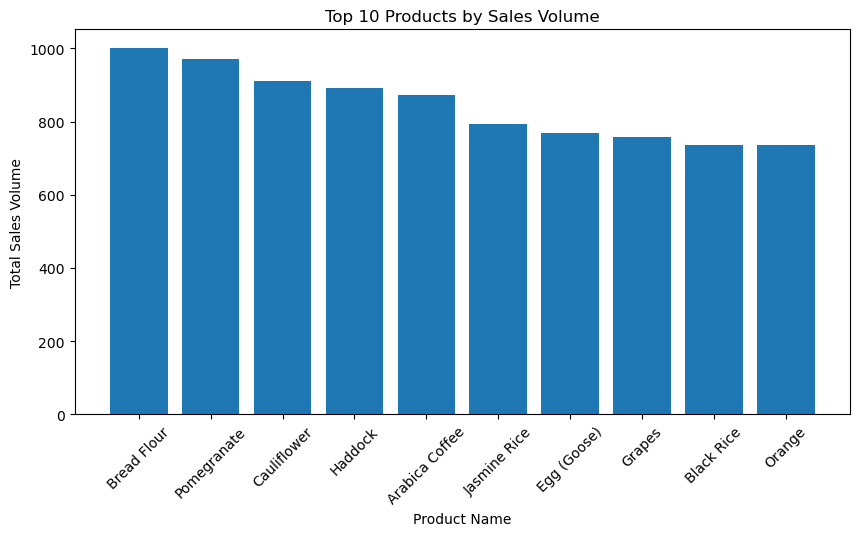

In [37]:
product_demand = (
    df.groupby('Product_Name')['Sales_Volume']
    .sum()
    .sort_values(ascending=False)
    .head(10)           
    .reset_index()
)

plt.figure(figsize=(10,5))
plt.bar(product_demand['Product_Name'], product_demand['Sales_Volume'])
plt.xticks(rotation=45)
plt.title('Top 10 Products by Sales Volume')
plt.xlabel('Product Name')
plt.ylabel('Total Sales Volume')
plt.show()

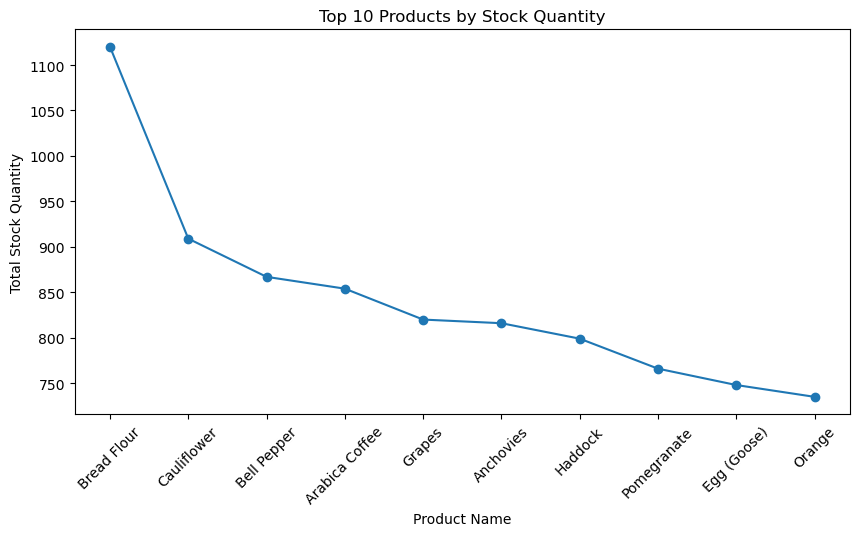

In [38]:
top10_stock = (
    df.groupby('Product_Name')['Stock_Quantity']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

plt.figure(figsize=(10,5))
plt.plot(top10_stock['Product_Name'], top10_stock['Stock_Quantity'], marker='o')
plt.xticks(rotation=45)
plt.title('Top 10 Products by Stock Quantity')
plt.xlabel('Product Name')
plt.ylabel('Total Stock Quantity')
plt.show()

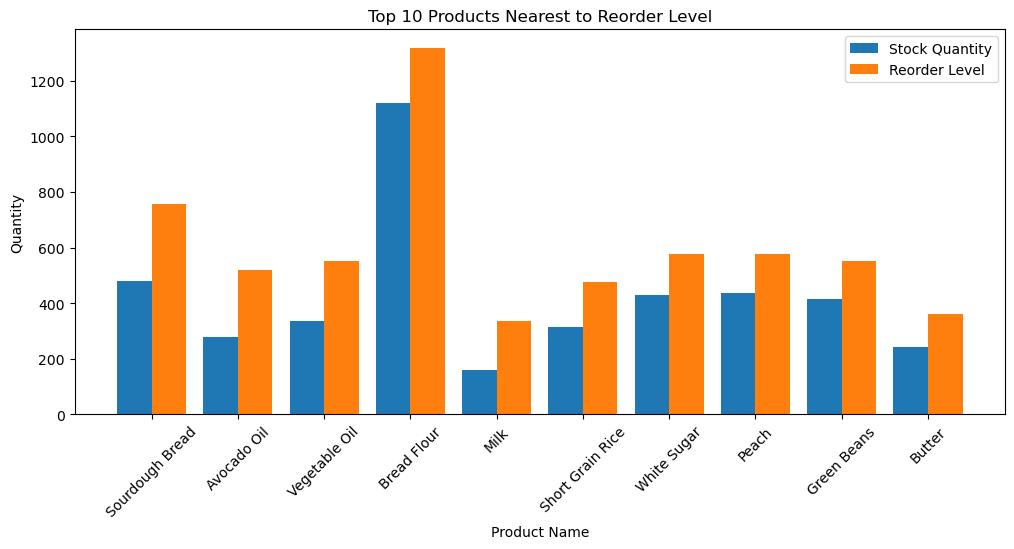

In [44]:
top10_inventory = (
    df.groupby('Product_Name')[['Stock_Quantity', 'Reorder_Level']]
    .sum()
    .assign(Difference=lambda x: x['Stock_Quantity'] - x['Reorder_Level'])
    .sort_values('Difference')    
    .head(10)
    .reset_index()
)

bar_width = 0.4
index = range(len(top10_inventory))

plt.figure(figsize=(12,5))
plt.bar(index, top10_inventory['Stock_Quantity'], bar_width, label='Stock Quantity')
plt.bar([i + bar_width for i in index], top10_inventory['Reorder_Level'], bar_width, label='Reorder Level')

plt.xticks([i + bar_width/2 for i in index], top10_inventory['Product_Name'], rotation=45)
plt.xlabel('Product Name')
plt.ylabel('Quantity')
plt.title('Top 10 Products Nearest to Reorder Level')
plt.legend()
plt.show()

In [34]:
import mysql.connector

connection = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Admin",
    database="Inventory"
)
cursor=connection.cursor()
cursor.execute( """
CREATE TABLE IF NOT EXISTS Product_detail (
    Product_Name VARCHAR(100) UNIQUE,
    Reorder_Level INT,
    Reorder_Quantity INT
);
""")

cursor.execute(create_table_query)
connection.commit()

countSQL = "SELECT COUNT(*) FROM Product_detail"
cursor.execute(countSQL)

totalCount = cursor.fetchone()[0]
print(totalCount)

if(totalCount == 0):
        insert_data = """INSERT INTO Product_detail (Product_Name, Reorder_Level, Reorder_Quantity) VALUES (%s, %s, %s)"""
        for _, row in top_10_combined.iterrows():
            cursor.execute(insert_query, tuple(row))
            connection.commit()
        print("Data inserted successfully")




30
